In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.7.0+cpu'

## Data prepairing and loading

Data can be almost anything.... in machine learning.

* Excel Spreadsheet
* Images of any kind
* Videos
* Audio
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some known data using linear regression formula.
We'll use a linear regression formula to make a straight line with known parameters.

In [2]:
import torch

# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

### Splitting data into train and test

In [4]:
train_split = int(0.8 * len(X))
train_split

40

In [5]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    
    """
    Plots training data, test data and compares predicitons.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    # If there are any predictions, plot them too
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    # Show the legend
    plt.legend(prop={"size":14})

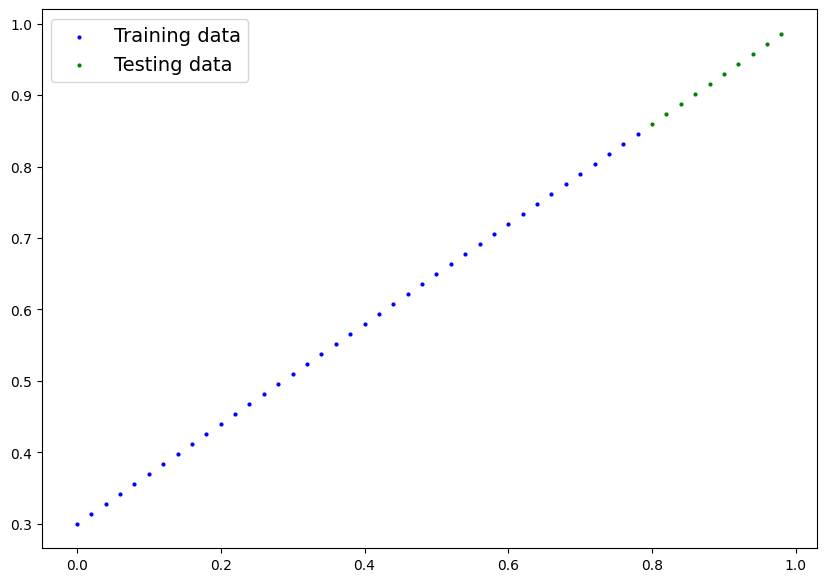

In [7]:
plot_predictions()

## Build first linear regression model

What our model does:
* Start with random values (weight&bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient Descent
2. Backpropagation 

In [8]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in Pytorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    # Forward method to define the computation in the model
    def forward(self, x:torch.Tensor)->torch.Tensor: # "x" is the input data
        return self.weights * x + self.bias # This is the linear regression formula
        

### Pytorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in forward computation

### Checking Pytorch Model Parameters

In [9]:
# create a random seed
torch.manual_seed(43)

# create an instance of the model (this is a subclass of nn.module)
model_0 = LinearRegressionModel()

# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([-0.6484], requires_grad=True),
 Parameter containing:
 tensor([-0.7058], requires_grad=True)]

In [10]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([-0.6484])), ('bias', tensor([-0.7058]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`.
When we pass data through our model, it's going to run it through the `forward()` method.

In [11]:
# make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[-1.2246],
        [-1.2375],
        [-1.2505],
        [-1.2635],
        [-1.2764],
        [-1.2894],
        [-1.3024],
        [-1.3153],
        [-1.3283],
        [-1.3413]])

In [12]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

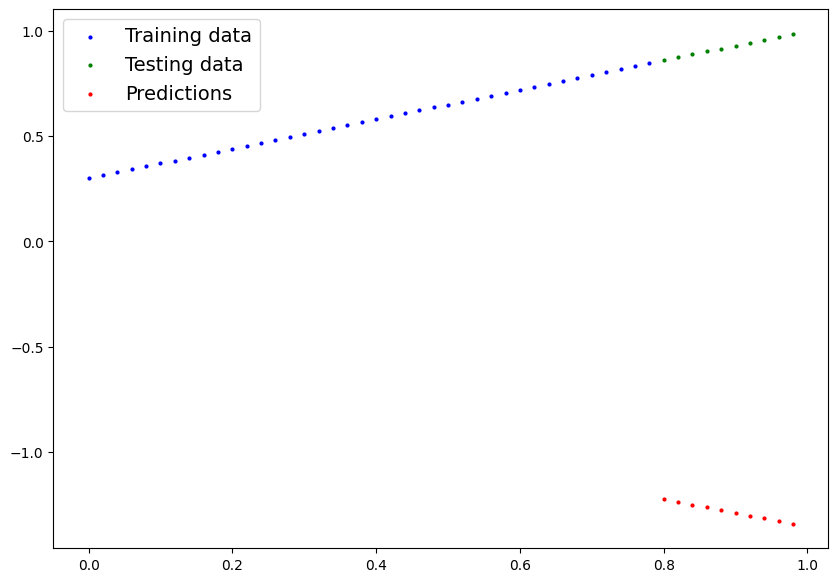

In [13]:
plot_predictions(predictions=y_preds)

### 3. Train model

The whole idea of training is for a model to move from some unknown parameters (these maybe random) to some know parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use loss function(cost function or criterion)

Things we need to train:
* Loss function: A function to measure how wrong your model's predictions are to the ideal outputs, lower is better
* Optimizer: Takes into account the loss of a model and adjusts the model's parameters(e.g. weights and biases in our case) to  improve the loss function.

And specially for pytorch, we need:
* A training loop
* A testing loop

In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([-0.6484], requires_grad=True),
 Parameter containing:
 tensor([-0.7058], requires_grad=True)]

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.6484])), ('bias', tensor([-0.7058]))])

In [16]:
#setup a loss function
loss_fn = nn.L1Loss()

# setup an optimezer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set

In [17]:
loss_fn

L1Loss()

In [18]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Building a training and testing loop in pytorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` methods) to make predictions on data - also called forward propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss(**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss(**gradient descent**)

In [19]:
# An epoch is one loop through the data...
epochs = 1000

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []
# 0. Loop through the data
for epoch in range(epochs):
    # set the model to the training mode
    model_0.train() # train mode in Pytorch sets all parameters that require gradients to require gradients
    
    # 1. Forward pass
    y_pred = model_0(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss with the respect to the parameters of the model
    loss.backward()
    
    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so...we have to zero them above in step 3 for the next iteration of the loop
    
    # testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
    with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
        # 1. do the forward pass
        test_pred = model_0(X_test)
        
        # 2. calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch}| Loss: {loss}| Test loss: {test_loss}")
        print(model_0.state_dict())

Epoch: 0| Loss: 1.5317178964614868| Test loss: 2.1924471855163574
OrderedDict({'weights': tensor([-0.6445]), 'bias': tensor([-0.6958])})
Epoch: 10| Loss: 1.4165079593658447| Test loss: 2.0577375888824463
OrderedDict({'weights': tensor([-0.6055]), 'bias': tensor([-0.5958])})
Epoch: 20| Loss: 1.3012980222702026| Test loss: 1.923027753829956
OrderedDict({'weights': tensor([-0.5665]), 'bias': tensor([-0.4958])})
Epoch: 30| Loss: 1.1860883235931396| Test loss: 1.7883180379867554
OrderedDict({'weights': tensor([-0.5275]), 'bias': tensor([-0.3958])})
Epoch: 40| Loss: 1.0708783864974976| Test loss: 1.6536080837249756
OrderedDict({'weights': tensor([-0.4885]), 'bias': tensor([-0.2958])})
Epoch: 50| Loss: 0.9556684494018555| Test loss: 1.5188981294631958
OrderedDict({'weights': tensor([-0.4495]), 'bias': tensor([-0.1958])})
Epoch: 60| Loss: 0.8404583930969238| Test loss: 1.3841882944107056
OrderedDict({'weights': tensor([-0.4105]), 'bias': tensor([-0.0958])})
Epoch: 70| Loss: 0.725248396396637| 

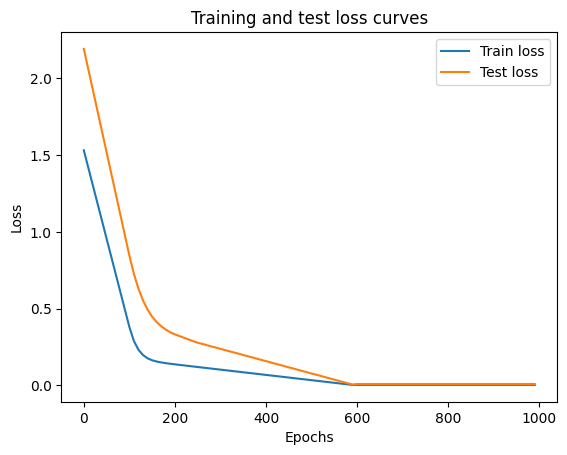

In [20]:
# Plot the loss curves
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

### Saving a model in Pytorch

1. `torch.save()` - allows you save a PyTorch object in python's pickle format.
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load model's saved state dictionary

In [21]:
# saving our pytorch model
from pathlib import Path

# 1. create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_0.pth


### Loading a PyTorch model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6945])), ('bias', tensor([0.2997]))])

In [23]:
# To load in a saved state_dict() we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [24]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6945])), ('bias', tensor([0.2997]))])

In [25]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
    
loaded_model_preds

tensor([[0.8552],
        [0.8691],
        [0.8830],
        [0.8969],
        [0.9108],
        [0.9247],
        [0.9386],
        [0.9525],
        [0.9663],
        [0.9802]])

In [26]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8552],
        [0.8691],
        [0.8830],
        [0.8969],
        [0.9108],
        [0.9247],
        [0.9386],
        [0.9525],
        [0.9663],
        [0.9802]])

In [27]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [28]:
# Import Libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.7.0+cpu'

Create device-agnostic code.
This means if we've got access to a GPU, our code will use it(for potentially faster computing).
If no GPU is available, the code will default to using CPU. 

In [29]:
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### 6.1 Data

In [32]:
# Create some data using the linear regression formula of y = weight * Y + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [33]:
# Split data
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

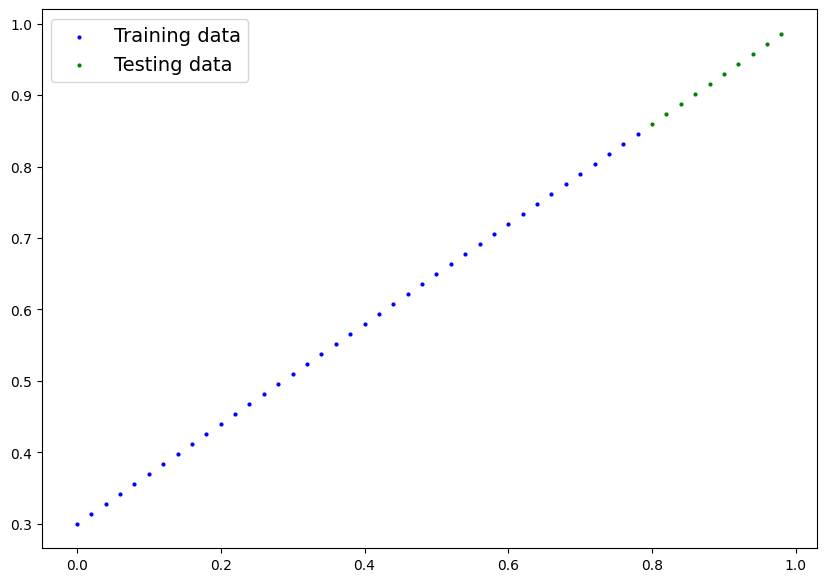

In [34]:
# plot the data
plot_predictions(X_train, y_train, X_test, y_test)

### Build a PyTorch linear model

In [35]:
# Creating a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
# Set the manual seed
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [36]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [38]:
# Set the model to use the target device(it's necessary when you want to use GPU instead of CPU for calculations)
model_1.to(device)
next(model_1.parameters()).device # i don't access to GPU, so it just uses the CPU

device(type='cpu')

In [39]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### 6.3 Training

For training we need:

*   Loss function
*   Optimizer
*   Training Loop
*   Testing Loop

In [40]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [42]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    
    # 1. forward pass
    y_pred = model_1(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. optimizer zero grad
    optimizer.zero_grad()
    
    # 4. perform backpropagation
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        
        test_loss = loss_fn(test_pred, y_test)
    
    # print what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 10 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 20 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 30 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 40 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 50 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 60 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 70 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 80 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 90 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 100 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 110 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 130 | Loss: 0.001264503574930

In [44]:
model_1.state_dict(), weight, bias

(OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
              ('linear_layer.bias', tensor([0.3025]))]),
 0.7,
 0.3)

### 6.4 Making and evaluating predictions

In [45]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
    
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

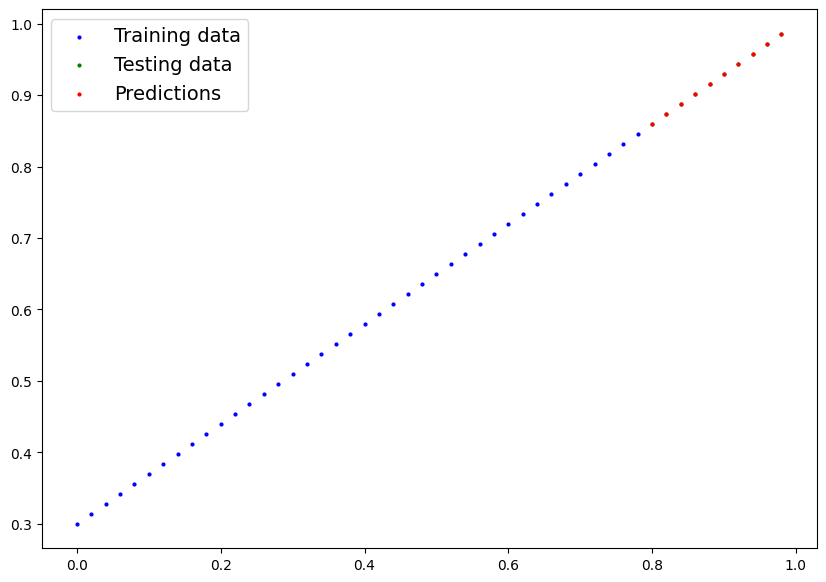

In [46]:
# Check out our model predicitons visually
plot_predictions(predictions=y_preds)

### Saving and loading a trained model

In [50]:
from pathlib import Path

# 1. create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# MODEL_SAVE_PATH

# 3. save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_1.pth


In [55]:
# load a Pytorch model

# Create a new instance of linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

# load the saved model_1 state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [52]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [53]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [56]:
# evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Exercises & Extra-curriculum

For exercise & extra-curriculum, refer to: https://www.learnpytorch.io/01_pytorch_workflow/#exercises